## Classifying healthy and people with Parkinson's Disease

## Importing libraries

In [1]:
import sys
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

## Reading the data set

In [2]:
people_data = pd.read_csv("parkinsons.data")

In [3]:
people_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Data Preprocessing

### Replacing the ":" with "_" and removing ')' & '(' on column names

In [4]:
people_data.columns = people_data.columns.str.replace('[:,(]', '_')
people_data.columns = people_data.columns.str.replace(')', '')

In [5]:
people_data.columns

Index(['name', 'MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_%',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

### Checking if the dataframe has any null values

In [6]:
people_data.isnull().values.any()

False

In [7]:
people_data.isna().sum()

name               0
MDVP_Fo_Hz         0
MDVP_Fhi_Hz        0
MDVP_Flo_Hz        0
MDVP_Jitter_%      0
MDVP_Jitter_Abs    0
MDVP_RAP           0
MDVP_PPQ           0
Jitter_DDP         0
MDVP_Shimmer       0
MDVP_Shimmer_dB    0
Shimmer_APQ3       0
Shimmer_APQ5       0
MDVP_APQ           0
Shimmer_DDA        0
NHR                0
HNR                0
status             0
RPDE               0
DFA                0
spread1            0
spread2            0
D2                 0
PPE                0
dtype: int64

### 1) Removing "name" column from dataframe
### 2) Assigning X ( data with name and status column dropped ) and y (Predicted data)

In [8]:
people_data_X = people_data.copy().drop(columns=["name", "status"])

In [9]:
people_data_X

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_%,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Assigning Predict/Target to y

In [10]:
people_data_y = people_data['status']

In [11]:
people_data_y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

## Data Visualization
### Look for any outlier by checking the mean, max values of the columns.

In [12]:
people_data.describe()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_%,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
# All the data are of similar/expected data type
people_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             195 non-null    object 
 1   MDVP_Fo_Hz       195 non-null    float64
 2   MDVP_Fhi_Hz      195 non-null    float64
 3   MDVP_Flo_Hz      195 non-null    float64
 4   MDVP_Jitter_%    195 non-null    float64
 5   MDVP_Jitter_Abs  195 non-null    float64
 6   MDVP_RAP         195 non-null    float64
 7   MDVP_PPQ         195 non-null    float64
 8   Jitter_DDP       195 non-null    float64
 9   MDVP_Shimmer     195 non-null    float64
 10  MDVP_Shimmer_dB  195 non-null    float64
 11  Shimmer_APQ3     195 non-null    float64
 12  Shimmer_APQ5     195 non-null    float64
 13  MDVP_APQ         195 non-null    float64
 14  Shimmer_DDA      195 non-null    float64
 15  NHR              195 non-null    float64
 16  HNR              195 non-null    float64
 17  status          

In [14]:
# Only 2 categories of target variable
people_data['status'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

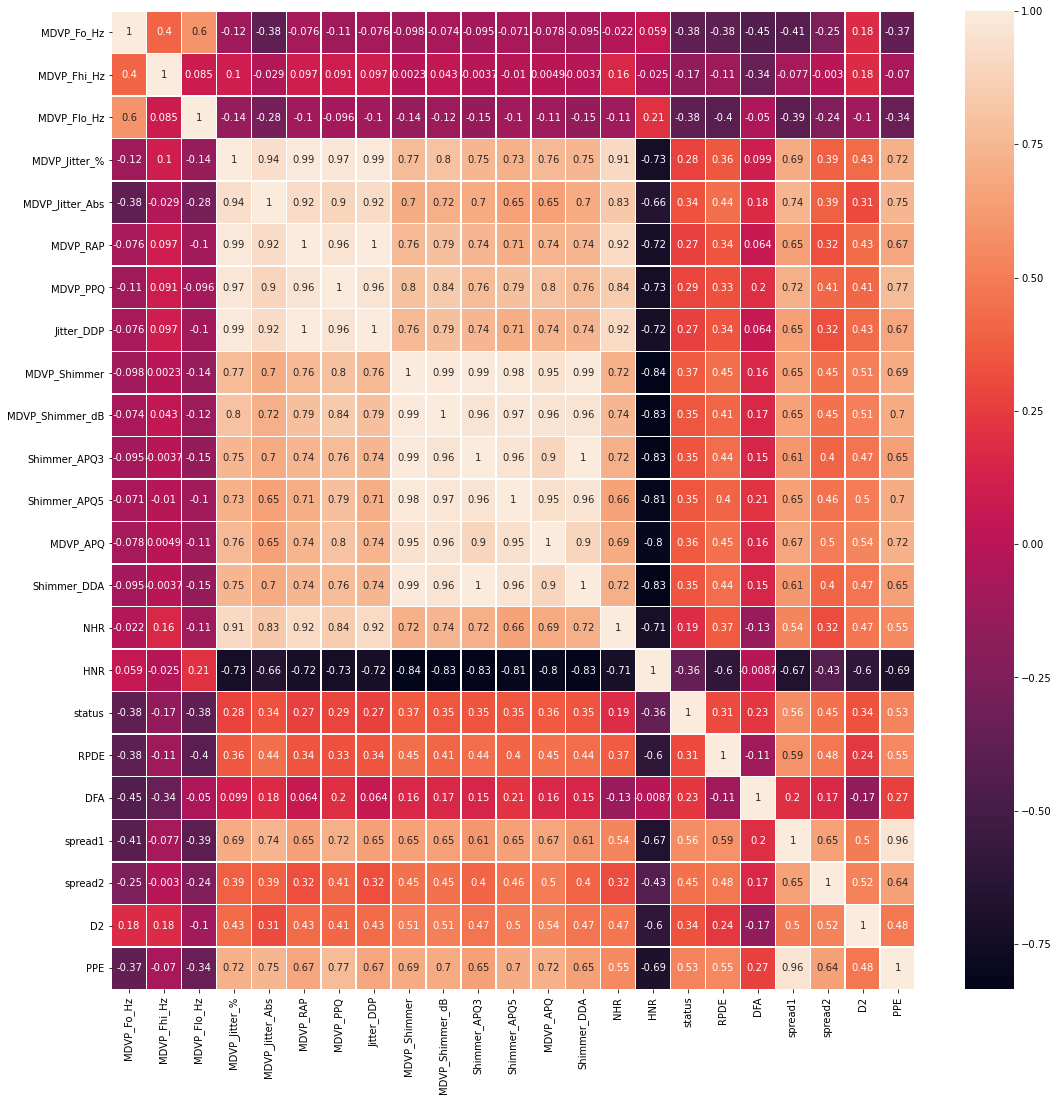

In [15]:
# plot the heatmap and annotation on it - to see how the data are correlated
fig, ax = plt.subplots(figsize=(18,18))
var_corr = people_data.corr()
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True, linewidths=.5, ax=ax)

## Standardize the columns to get them on the same scale

In [16]:
people_data_X = preprocessing.StandardScaler().fit(people_data_X).transform(people_data_X.astype(float))

In [17]:
people_data_X

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

### Splitting the Train and test data ( 80:20 )

In [18]:
X_train, X_test, y_train, y_test = train_test_split( people_data_X, people_data_y, test_size=0.2, random_state=4)

### Train the model with train data
### Predicting the status for the test data
### Calculating the confusion matrix  and accuracy score

In [19]:
k_list = []
# Choosing the K value as SQRT(number of data points in the dataset)
k_sqrt = int(np.ceil(math.sqrt(len(people_data))) // 2 * 2 + 1)
k_list.append(k_sqrt)

# Choosing some random value of K
print("Enter your choice of K : ")
k_ran = int(input())
k_list.append(k_ran)

Enter your choice of K : 
5


### By default, "sklearn metrics" library uses "Euclidean" distance method to calculate the distance between the data points

Accuracy of model at K=15 is 0.7435897435897436
----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        12
           1       0.73      1.00      0.84        27

    accuracy                           0.74        39
   macro avg       0.86      0.58      0.56        39
weighted avg       0.81      0.74      0.67        39

Accuracy of model at K=5 is 0.9230769230769231
----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.90      1.00      0.95        27

    accuracy                           0.92        39
   macro avg       0.95      0.88      0.90        39
weighted avg       0.93      0.92      0.92        39



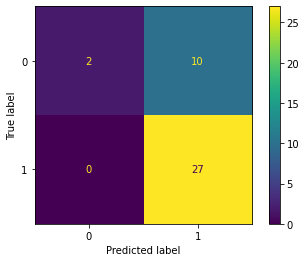

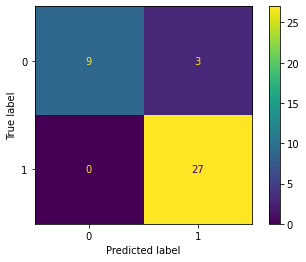

In [20]:
#Train Model and Predict for the test data for both the 'K' values
for k in k_list:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    Pred_y = neigh.predict(X_test)
    cm=confusion_matrix(y_test, Pred_y)
    print("Accuracy of model at K={} is {}".format(k , metrics.accuracy_score(y_test, Pred_y)))
    print("----------------------------------------------------------------------------------")
    print(classification_report(y_test, Pred_y))
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot()

#### From the above confusion matrices and classification reports, we see a considerable difference in the accuracy / f1-score for 'k=sqrt(n)' , n - number of data points in the dataset and random user fed 'k' integer.
#### Also, we will compare the F1-Scores of different K, choose the model that gives us highest F1-Score.

## Plotting error rate for different values of K (80% of datapoints)

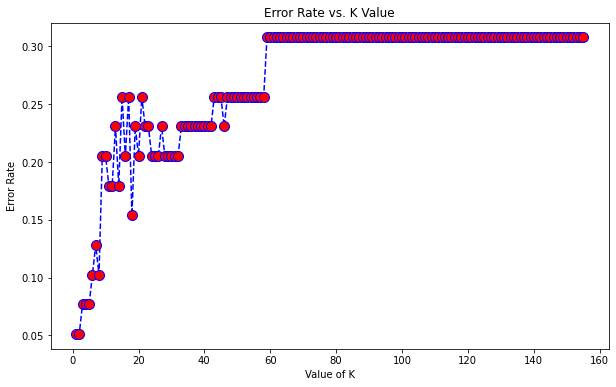

In [21]:
error_rate = []
for i in range(1,156):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,156),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Value of K')
plt.ylabel('Error Rate')
print(' ')

### The above plot shows the value of "Error rate" against the "K"  , where the 'error rate' is lower for the lower values of K.

## Plotting Accuracy vs values of K ( ranging from 1 to 40 )

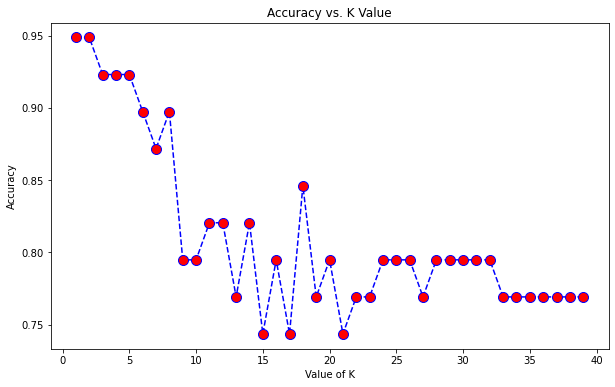

In [22]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
print(' ')

### The above plot shows the value of "Accuracy" against the "K"  , where the 'Accuracy' is higher for the lower values of K.

## Future scope of the work

#### We can fit the model for different data points with various K values and calculate the Accuracy , lower error rate along with high F1-score and pick the best model to predict the chance of patients getting affected with Parkinson's disease.